# **Spotify Clustering:** Data Preprocessing
Aurellia Gita Elysia | 2602569722

Dataset:<br>
https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/data

-------

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime
from sklearn.manifold import TSNE

# 2. Load Dataset

In [2]:
df = pd.read_csv('raw_dataset.csv', encoding='ISO-8859-1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


# 3. Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


# 4. Data Preprocessing

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4600   │ │ string      │ 22    │                                                          │
│ │ Number of columns │ 29     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                                         ┃ NA                  ┃ NA %                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ TIDAL Popularity                                               │                4600 │                 100 │  │
│ └────────────────────────────────────────────────────────────────┴─────────────────────┴─────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column           ┃ NA   ┃ NA %             ┃ mean   ┃ sd     ┃ p0   ┃ p25  ┃ p50  ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Track Score      │    0 │                0 │  41.84 │  38.54 │ 19.4 │ 23.3 │ 29.9 │ 44.42 │ 725.4 │   ▇    │  │
│ │ Spotify          │  804 │ 17.4782608695652 │   63.5 │  16.19 │    1 │   61 │   67 │    73 │    96 │ ▁ ▁▃▇▁ │  │
│ │ Popularity       │      │                2 │        │        │      │      │      │       │       │        │  │
│ │ Apple Music      │  561 │ 12.1956521739130 │   54.6 │  71.61 │    1 │   10 │   28 │    70 │   859 │   ▇▁   │  │
│ │ Playlist Count   │      │               43 │        │        │      │      │      │       │       │        │  │
│ │ Deezer Playlist  │  921 │ 20.0217391304347 │  32.31 │  54.27 │    1 │    5 │   15 │    37 │   632 │   ▇    │  │
│ │ Count            │      │                8 │        │        │      │      │      │       │       │        │  │
│ │ Amazon Playlist  │ 1055 │ 22.9347826086956 │  25.35 │  25.99 │    1 │    8 │   17 │    34 │   210 │   ▇▂   │  │
│ │ Count            │      │               52 │        │        │      │      │      │       │       │        │  │
│ │ Explicit Track   │    0 │                0 │ 0.3589 │ 0.4797 │    0 │    0 │    0 │     1 │     1 │ ▇    ▅ │  │
│ └──────────────────┴──────┴──────────────────┴────────┴────────┴──────┴──────┴──────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━

## 4.1. Duplicates

In [6]:
print('Duplicates in dataset:', df.duplicated().sum())

Duplicates in dataset: 2


In [7]:
df = df.drop_duplicates(keep='first')
df = df.reset_index(drop=True)

print('Duplicates in dataset after removal:', df.duplicated().sum())

Duplicates in dataset after removal: 0


**💡 Explanation:**<br>
> Initially, there were 2 rows of duplicates in the dataset. To handle this, we only need to drop those duplicate rows, then reset the index of the whole dataset. Last step is to recheck if the duplicated rows have been successfully dropped.

## 4.2. Drop Unnecessary Columns

In [8]:
# Convert 'Release Date' to 'Song Age'
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Song Age'] = 2024 - df['Release Date'].dt.year

In [9]:
# Drop unnecessary columns
drop_columns = [
    "Track", "Album Name", "Artist", "ISRC", "Release Date", "All Time Rank", "TIDAL Popularity", "AirPlay Spins", "SiriusXM Spins", "Deezer Playlist Count", "Deezer Playlist Reach", "Amazon Playlist Count", "Pandora Streams", "Pandora Track Stations"
]
df.drop(columns=drop_columns, inplace=True)

**💡 Explanation:**<br>
> In this clustering analysis, certain columns were removed to ensure a clean, relevant dataset for identifying music trends. Text-based columns like `Track`, `Album Name`, and `Artist` were dropped as they do not contribute to numerical clustering. Similarly, `ISRC` (a unique identifier) was irrelevant.
>
> The `Release Date` column was transformed into `Song Age` (2024 - Release Year) to analyze how newer and older hits differ. `All Time Rank` was removed due to high correlation with existing popularity metrics.
>
> While the `Soundcloud Streams` and `TIDAL Popularity` columns are dropped due to excessive missing values, making them insufficient for meaningful contribution nor effective handling.

## 4.3. Missing Value

In [10]:
df.isnull().sum()

Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
Soundcloud Streams            3332
Shazam Counts                  577
Explicit Track                   0
Song Age                         0
dtype: int64

**💡 Explanation:**<br>
> Based on the output above, there are a lot of missing values within the dataset that need to be handled to ensure the quality of the data to train the model.

In [11]:
# Remove commas from 'Spotify Streams' to ensure proper numeric conversion
if 'Spotify Streams' in df.columns:
    df['Spotify Streams'] = df['Spotify Streams'].astype(str).str.replace(",", "").astype(float)

# Convert all numerical columns explicitly to float
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values in numerical columns with median
df = df.fillna(df.median(numeric_only=True))

In [12]:
df.isnull().sum()

Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
Soundcloud Streams            0
Shazam Counts                 0
Explicit Track                0
Song Age                      0
dtype: int64

**💡 Explanation:**<br>
> In this section, we remove commas from the `Spotify Streams` column and convert it to a float. This is necessary because some numerical values may be stored as strings with commas (e.g., "1,000,000"), preventing proper numerical operations.
>
> Next, we apply `pd.to_numeric(errors='coerce')` to convert all columns to numerical format. This step is crucial because some columns may contain mixed data types or invalid values that need to be handled properly. Using `errors='coerce'`, any non-numeric values will be converted to `NaN`, preventing unexpected errors during analysis.
>
> Finally, we fill all missing numerical values using the median. The median is chosen instead of the mean because it is less sensitive to outliers, ensuring that extreme values (e.g., highly streamed viral songs) do not skew the imputed values. This keeps the dataset more stable and improves the quality of clustering.

## 4.4. Normalize Data

In [13]:
features = [
    "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach", "Spotify Popularity", "Shazam Counts", "Track Score", "TikTok Posts", "TikTok Likes", "TikTok Views", "Explicit Track", "Song Age"
]
df_selected = df[features]

In [14]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

In [15]:
df_scaled

array([[0.0912    , 0.07746479, 0.05460922, ..., 0.39060832, 0.        ,
        0.        ],
       [0.07560557, 0.07746479, 0.05460922, ..., 0.39060832, 1.        ,
        0.        ],
       [0.14044441, 0.07746479, 0.05460922, ..., 0.39060832, 0.        ,
        0.        ],
       ...,
       [0.04437068, 0.07746479, 0.05460922, ..., 0.39060832, 1.        ,
        0.10810811],
       [0.03397572, 0.07746479, 0.05460922, ..., 0.39060832, 0.        ,
        0.21621622],
       [0.05973176, 0.07746479, 0.05460922, ..., 0.39060832, 1.        ,
        0.18918919]], shape=(4598, 11))

# 5. Clustering

## 5.1. Determine Optimal Number of Clusters

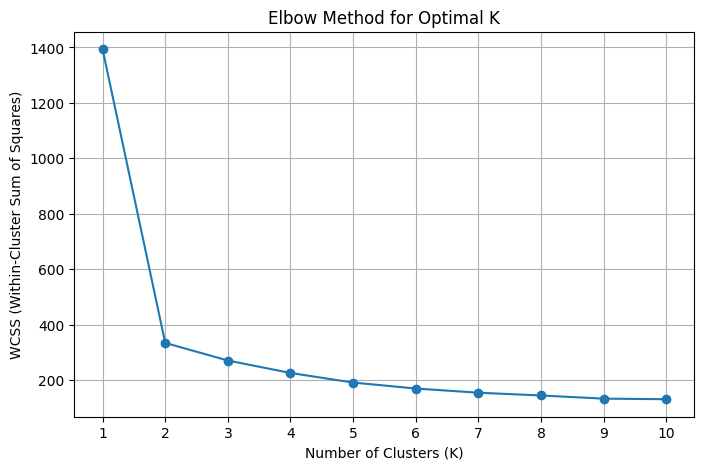

In [16]:
# Elbow Method
wcss = []
k_range = range(1, 11)  # Checking for K from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Append the WCSS (sum of squared distances)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

**💡 Explanation:**<br>
> **The Elbow Method** plot shows that the optimal number of clusters occurs around **K=3** or **K=4**, where the Within-Cluster Sum of Squares (WCSS) **decreases significantly before stabilizing**. With four clusters, the model can differentiate between distinct song groupings based on factors such as stream count, playlist reach, TikTok engagement, and explicit content. This clustering helps identify patterns such as viral hits, evergreen songs, niche tracks, and mainstream chart-toppers, providing valuable insights into the music trends of 2024.

In [17]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

sil_score = silhouette_score(df_scaled, df["Cluster"])
print(f"Silhouette Score for K={optimal_k}: {sil_score:.4f}")

Silhouette Score for K=4: 0.5306


**💡 Explanation:**<br>
> **The Silhouette Score** for K=4 is 0.5306, indicating that the clusters are **moderately well-separated**. A score above 0.5 suggests that most data points are correctly assigned to distinct clusters, but there may be some overlap between certain song groups. This is expected, as some popular Spotify songs share characteristics across multiple categories.

In [22]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_selected.columns)
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
   Spotify Streams  Spotify Playlist Count  Spotify Playlist Reach  \
0         0.302887                0.077069                0.054529   
1         0.103756                0.087141                0.056113   
2         0.053930                0.098999                0.058596   
3         0.033367                0.161238                0.081063   

   Spotify Popularity  Shazam Counts  Track Score  TikTok Posts  TikTok Likes  \
0            0.754625       0.076763     0.041468      0.247668      0.144239   
1            0.677797       0.078045     0.034840      0.246259      0.144722   
2            0.684602       0.076767     0.026571      0.251136      0.145490   
3            0.183998       0.099045     0.032311      0.240248      0.146638   

   TikTok Views  Explicit Track  Song Age  
0      0.390608    1.110223e-16  0.230403  
1      0.390628    1.000000e+00  0.082571  
2      0.391137    4.274359e-15  0.061194  
3      0.391280   -2.220446e-16  0.068657  


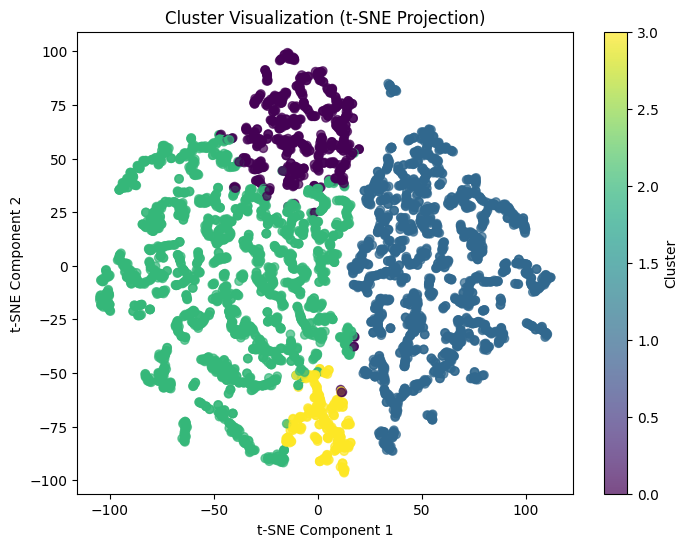

In [23]:
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df["Cluster"], cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Cluster Visualization (t-SNE Projection)")
plt.colorbar(label="Cluster")
plt.show()

**💡 Explanation:**<br>
> The t-SNE projection with perplexity = 10 effectively separates the clusters, indicating that the songs have distinct grouping patterns based on Spotify engagement metrics. Each cluster appears well-defined with minimal overlap, suggesting that the features used (e.g., streams, playlist reach, TikTok influence) contribute meaningfully to differentiating song categories. This visualization confirms that K=4 provides a reasonable segmentation of popular Spotify songs in 2024.

## 5.2. Cluster Analysis

In [20]:
print(df["Cluster"].value_counts())


Cluster
2    2094
1    1651
0     605
3     248
Name: count, dtype: int64


In [21]:
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)

         Spotify Streams  Spotify Playlist Count  Spotify Playlist Reach  \
Cluster                                                                    
0           1.292583e+09               77.608264               55.420661   
1           4.442296e+08               87.617807               57.000606   
2           2.305912e+08               99.435530               59.484718   
3           1.428597e+08              161.270161               81.901210   

         Spotify Popularity  Shazam Counts  Track Score  TikTok Posts  \
Cluster                                                                 
0                 72.626446      75.000000    48.583306    240.905785   
1                 65.390672      76.235009    43.997093    239.379164   
2                 66.045845      75.003343    38.170917    244.056829   
3                 18.479839      96.479839    42.211290    233.560484   

         TikTok Likes  TikTok Views  Explicit Track  Song Age  
Cluster                                 

<Figure size 800x500 with 0 Axes>

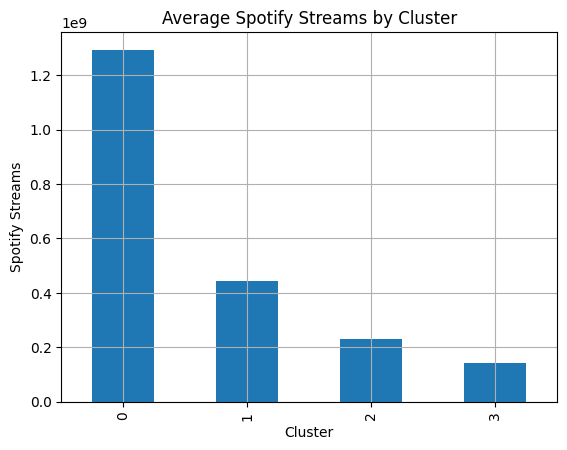

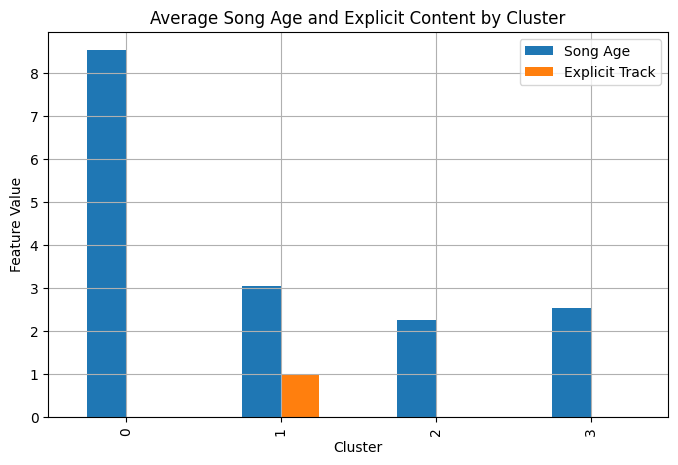

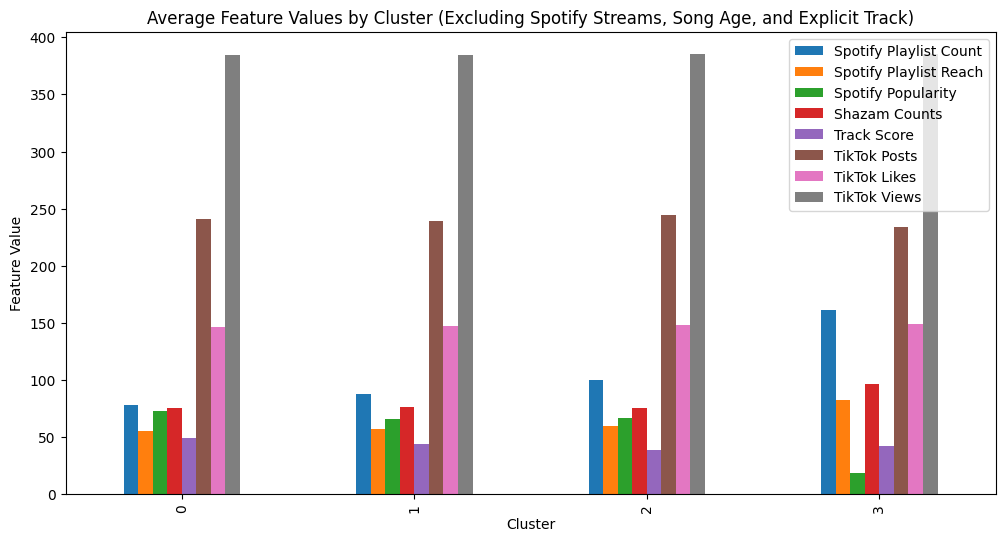

In [29]:
# Plot Spotify Streams
plt.figure(figsize=(8, 5))
df.groupby("Cluster")[["Spotify Streams"]].mean().plot(kind="bar", legend=False)
plt.title("Average Spotify Streams by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Spotify Streams")
plt.grid(True)
plt.show()

# Plot Song Age & Explicit Track
age_explicit_features = ["Song Age", "Explicit Track"]
df.groupby("Cluster")[age_explicit_features].mean().plot(kind="bar", figsize=(8, 5))
plt.title("Average Song Age and Explicit Content by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Plot All Other Features
other_features = [f for f in features if f not in ["Spotify Streams", "Song Age", "Explicit Track"]]
df.groupby("Cluster")[other_features].mean().plot(kind="bar", figsize=(12, 6))
plt.title("Average Feature Values by Cluster (Excluding Spotify Streams, Song Age, and Explicit Track)")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.legend(loc="upper right")
plt.show()

**💡 Explanation:**<br>
> The first chart shows Spotify Streams per cluster. Cluster 0 has by far the highest average streams, suggesting that it contains evergreen hits or globally dominant songs. Cluster 1 follows, likely representing mainstream popular tracks. Clusters 2 and 3 have significantly lower streams, indicating that they may contain newer, emerging, or niche songs that haven't reached massive popularity yet.
>
> The second chart compares other feature values across clusters. Clusters 0 and 1 have high playlist reach and TikTok engagement, meaning they are well-integrated into Spotify’s ecosystem and benefit from social media influence. Cluster 2 shows high playlist count, suggesting these songs are actively promoted via editorial playlists, but their streams remain lower. Cluster 3, while having the lowest streams, has high Shazam counts, which suggests it may contain rising viral hits that people are actively discovering.

---

# 📊 **Final Analysis**
## **Cluster 0:** Highest Streams, Long-Term Success<br>
These songs have **the highest Spotify streams (~1.3 billion) and the oldest average age (8.5 years)**, showing their long-term success. They are **less reliant on playlists** and are often **searched for directly by listeners**, typically belonging to legendary artists, soundtracks, or timeless pop hits. Their continued dominance highlights **their cultural impact and strong audience loyalty**.


## **Cluster 1:** Trending Social Media Hits<br>
With **moderately high streams (~444 million), high TikTok influence, and high explicit content**, these songs are **recent (3 years old on average)** and benefit from **social media virality and strong playlist placement**. They are commonly found in **pop, hip-hop, and rap genres** and gain popularity through **Spotify’s algorithm and social media engagement**, making them the **trending songs of the moment**.


## **Cluster 2:** High Playlist Count with Steady Growth<br>
These songs have **moderate Spotify streams (~230 million) but the highest playlist count**, meaning their popularity is **largely driven by curated playlists rather than organic searches or viral success**. They are often **radio-friendly, non-explicit**, and belong to genres like **pop, indie, or chill music**, thriving within **Spotify’s curated ecosystem**.

## **Cluster 3:** Potential Songs (Low Streams, High Discovery Rate)<br>
With **the lowest average streams (~143 million) but the highest Shazam counts**, these songs are **new (2.5 years old) and actively being discovered** by listeners. Some of these tracks may be **early-stage viral hits**, with **outliers that suggest future breakout potential**. Their strong discovery rates indicate that they are **on the rise and may soon enter the mainstream**